Notebook to comapre stratificaiton and currents between two simulations. Will aid in interpreting effect of parameter changes.

In [1]:
import netCDF4 as nc
from salishsea_tools import nc_tools
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
results = '/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/'

run1 = 'base_aug_bbl_diff2'
run2 = 'base_aug'

path={}
path[run1]= os.path.join(results,run1)
path[run2] = os.path.join(results,run2)

print path[run1]
print path[run2]

/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/base_aug_bbl_diff2
/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/base_aug


In [3]:
Us = {}; Ws = {}; Ts = {}; Ss={}; Diffs={}; Viscs={}; sshs={}

runs = [run1, run2]
y=5
for run in runs:
    f = nc.Dataset(os.path.join(path[run],'SalishSea_1d_20030819_20030927_grid_U.nc'))
    Us[run] = f.variables['vozocrtx'][:,:,y,:]
    f = nc.Dataset(os.path.join(path[run],'SalishSea_1d_20030819_20030927_grid_W.nc'))
    Ws[run] = f.variables['vovecrtz'][:,:,y,:]
    #Viscs[run] = f.variables['ve_eddy_visc'][:,:,y,:]
    #Diffs[run] = f.variables['ve_eddy_diff'][:,:,y,:]
    f = nc.Dataset(os.path.join(path[run],'SalishSea_1d_20030819_20030927_grid_T.nc'))
    Ts[run] = f.variables['votemper'][:,:,y,:]
    Ss[run] = f.variables['vosaline'][:,:,y,:]
    sshs[run] = f.variables['sossheig'][:,y,:]
    
depths = f.variables['deptht'][:]
x = f.variables['nav_lon'][y,:]
times=np.arange(sshs[run].shape[0])

xx,zz = np.meshgrid(x,-depths[:])

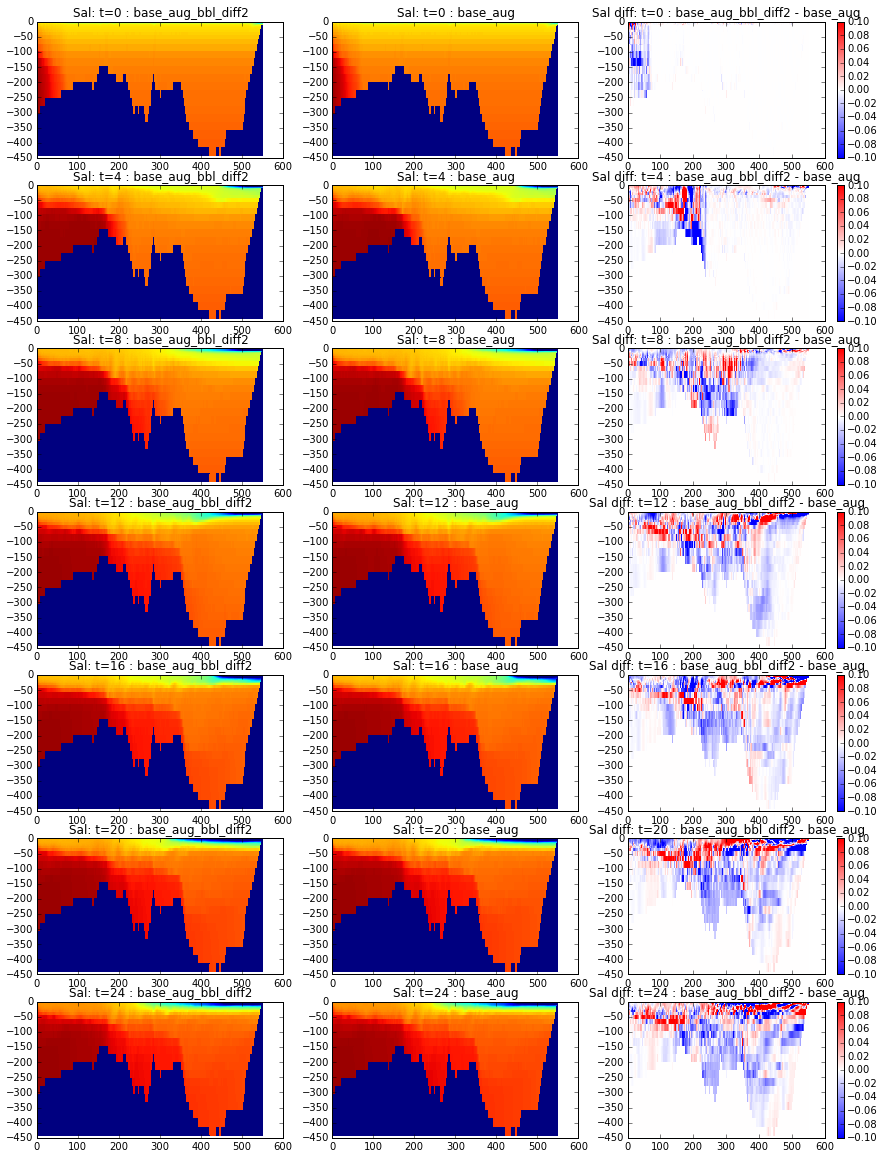

In [8]:
fig, axs = plt.subplots(7,3,figsize=(15,20))
ts = np.arange(0,27,4)

for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        ax.pcolormesh(xx,zz,Ss[run][t,:,:],vmin=20,vmax=34)
        ax.set_title('Sal: t={} : {}'.format(t, run))
        
for t, ax in zip(ts, axs[:,2].flat):
    mesh=ax.pcolormesh(xx,zz,Ss[run1][t,:,:]-Ss[run2][t,:,:],vmin=-.1,vmax=.1,cmap='bwr')
    ax.set_title('Sal diff: t={} : {} - {}'.format(t, run1, run2))
    plt.colorbar(mesh,ax=ax)

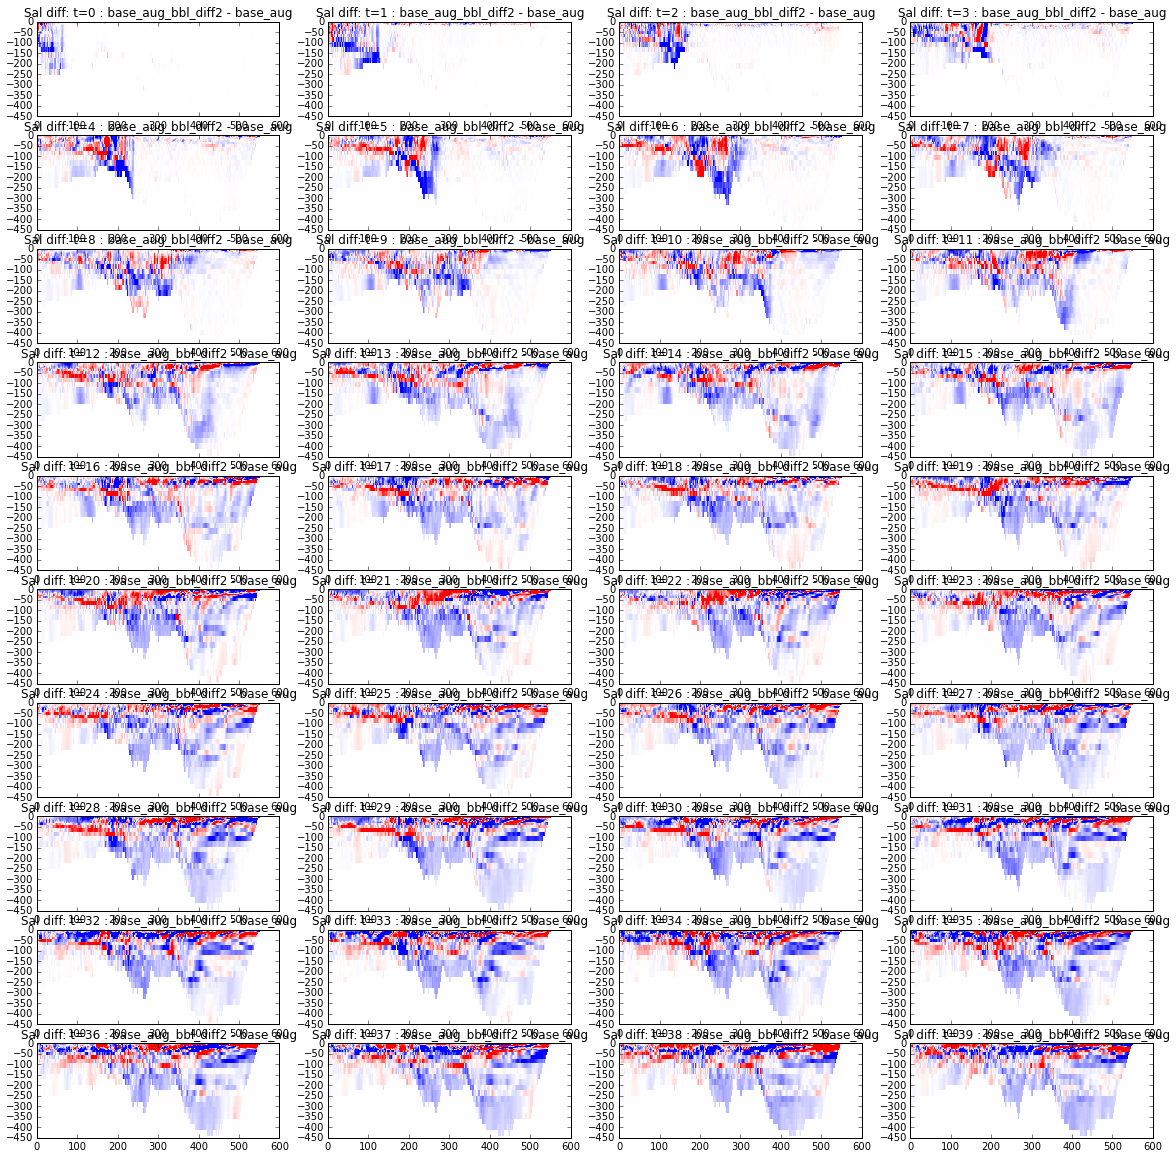

In [5]:
fig, axs = plt.subplots(10,4,figsize=(20,20))
ts = np.arange(40)

for t, ax in zip(ts, axs[:].flat):
    ax.pcolormesh(xx,zz,Ss[run1][t,:,:]-Ss[run2][t,:,:],vmin=-.1,vmax=.1,cmap='bwr')
    ax.set_title('Sal diff: t={} : {} - {}'.format(t, run1, run2))
    #ax.set_ylim([-50,0])

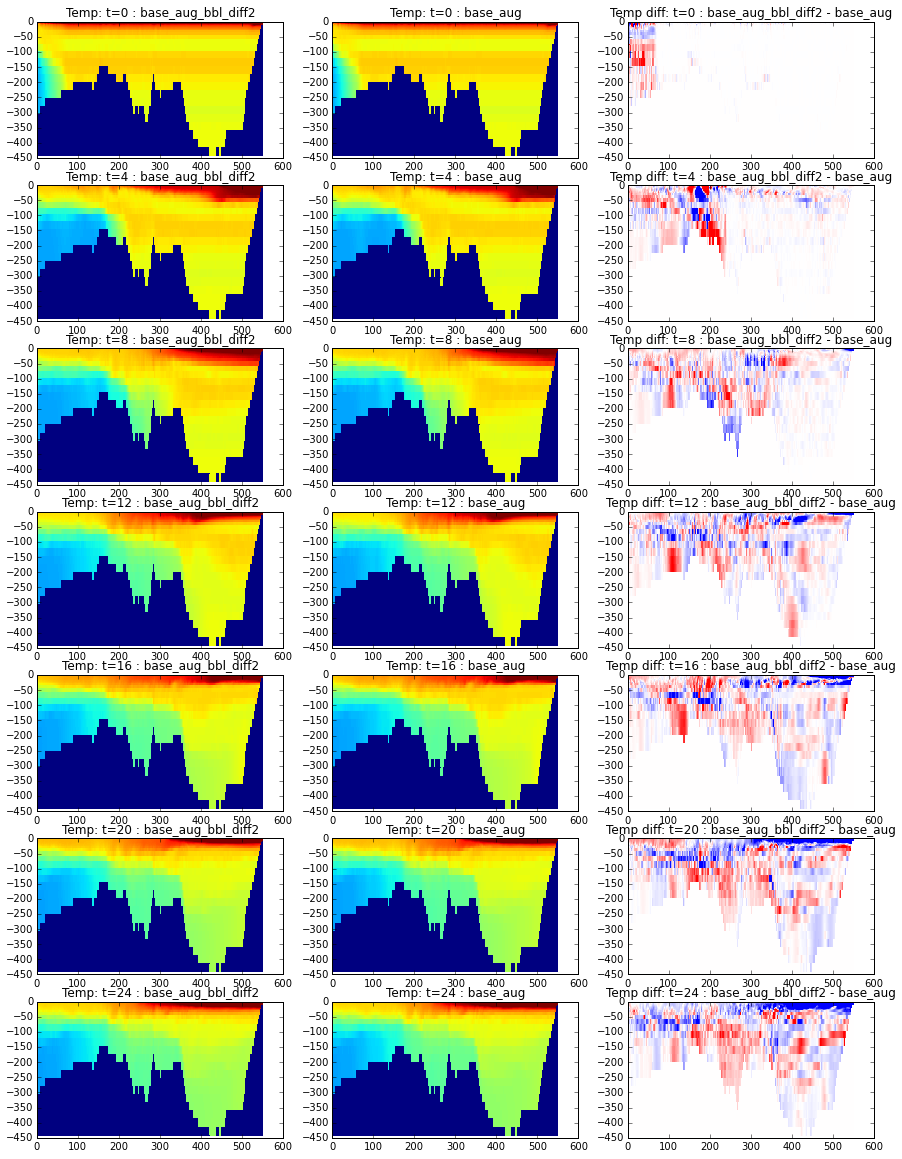

In [6]:
fig, axs = plt.subplots(7,3,figsize=(15,20))
ts = np.arange(0,27,4)

for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        ax.pcolormesh(xx,zz,Ts[run][t,:,:],vmin=5,vmax=12)
        ax.set_title('Temp: t={} : {}'.format(t, run))
        
for t, ax in zip(ts, axs[:,2].flat):
    ax.pcolormesh(xx,zz,Ts[run1][t,:,:]-Ts[run2][t,:,:],vmin=-.1,vmax=.1,cmap='bwr')
    ax.set_title('Temp diff: t={} : {} - {}'.format(t, run1, run2))
    #ax.set_ylim([-50,0])

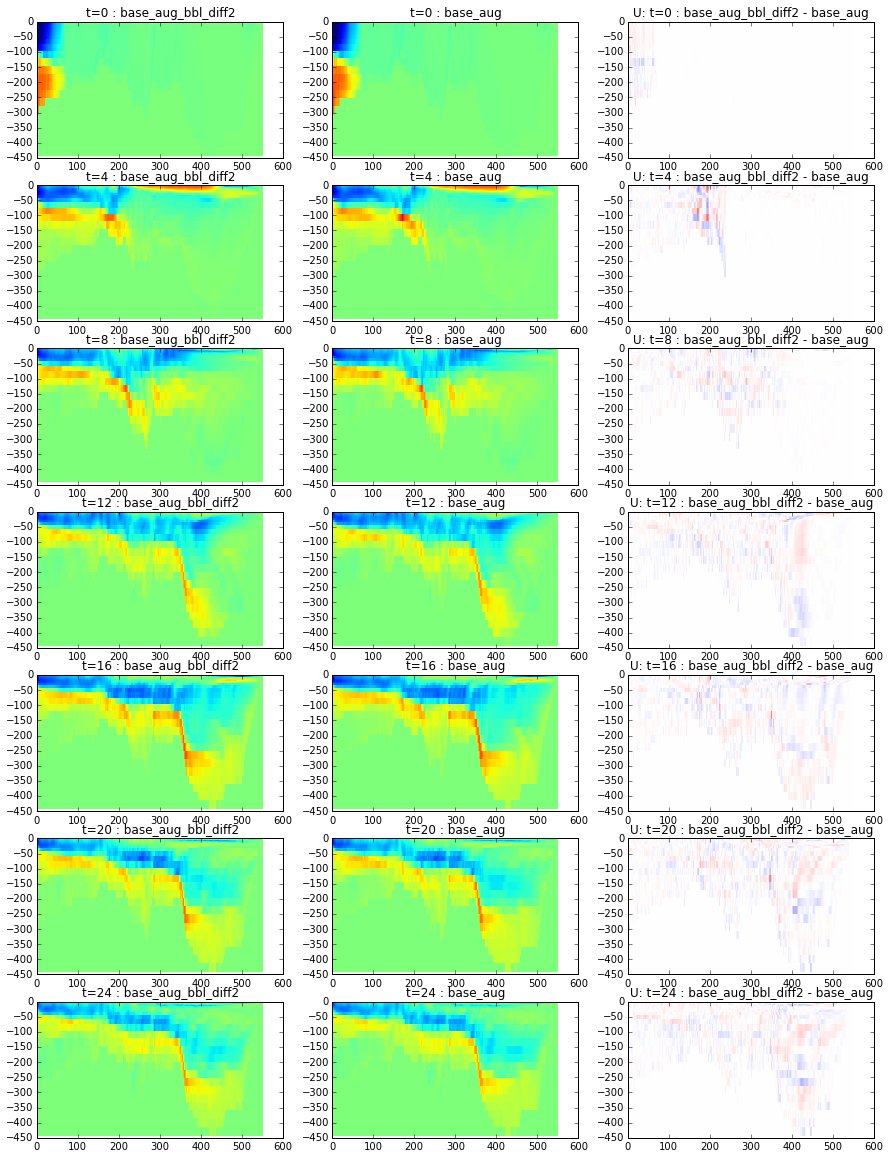

In [9]:
fig, axs = plt.subplots(7,3,figsize=(15,20))
ts = np.arange(0,27,4)

for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        ax.pcolormesh(xx,zz,Us[run][t,:,:],vmin=-1,vmax=1)
        ax.set_title('t={} : {}'.format(t, run))
        
for t, ax in zip(ts, axs[:,2].flat):
    ax.pcolormesh(xx,zz,Us[run1][t,:,:]-Us[run2][t,:,:],vmin=-.5,vmax=.5,cmap='bwr')
    ax.set_title('U: t={} : {} - {}'.format(t, run1, run2))
    #ax.set_ylim([-50,0])

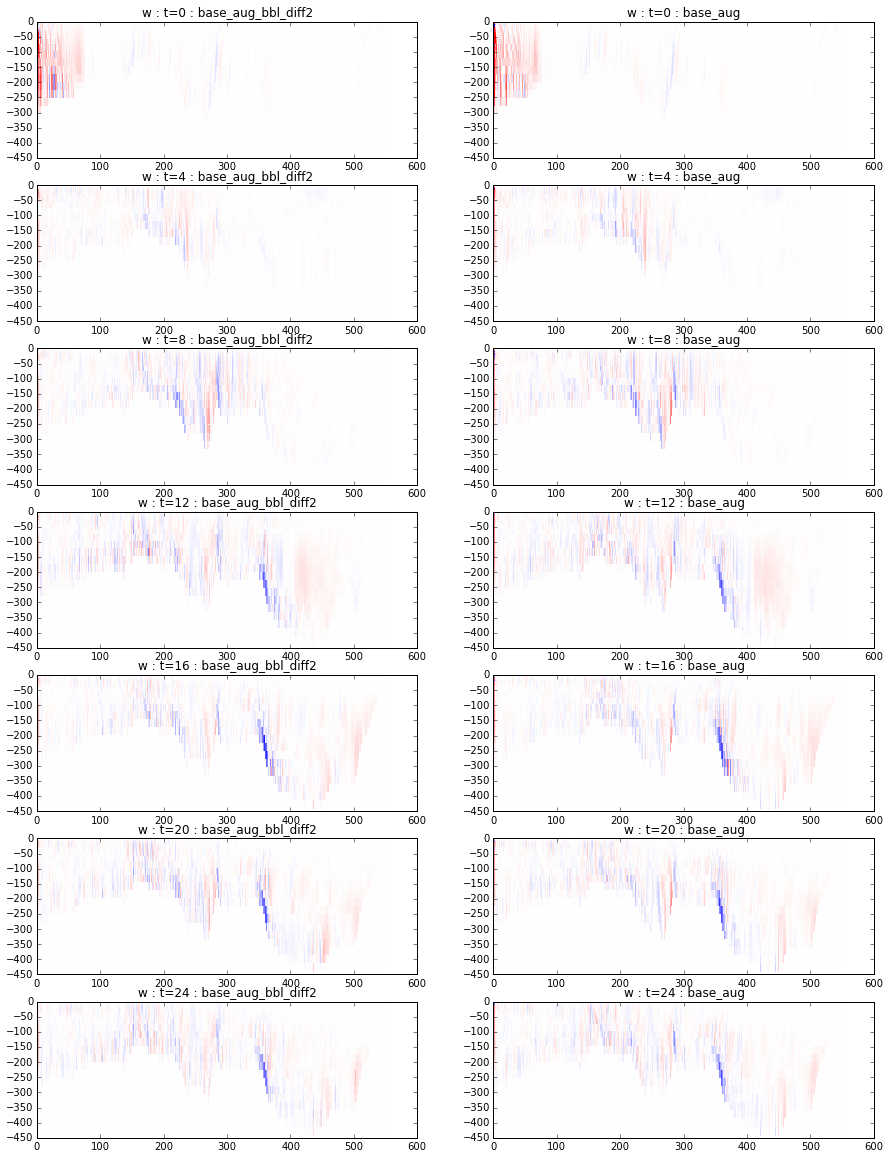

In [10]:
fig, axs = plt.subplots(7,2,figsize=(15,20))
ts = np.arange(0,27,4)

for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        ax.pcolormesh(xx,zz,Ws[run][t,:,:],vmin=-.01,vmax=.01,cmap='bwr')
        ax.set_title('w : t={} : {}'.format(t, run))


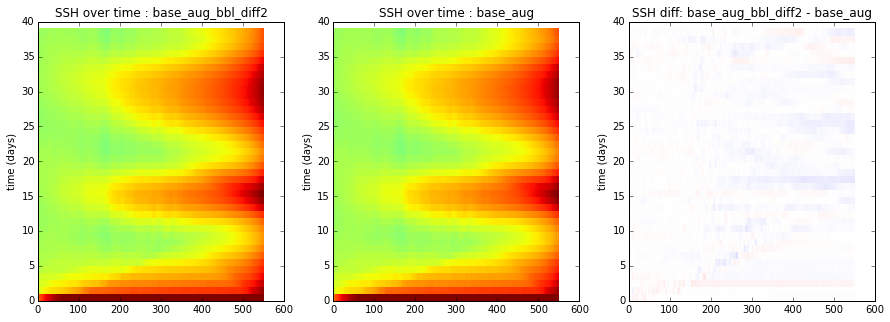

In [11]:
fig, axs = plt.subplots(1,3,figsize=(15,5))


for n, run in enumerate(runs):
    ax=axs[n]
    ax.pcolormesh(x,times,sshs[run],vmin=-.5,vmax=.5)
    ax.set_title('SSH over time : {}'.format( run))
    ax.set_ylabel('time (days)')
        
ax=axs[2]
ax.pcolormesh(x,times,sshs[run1]-sshs[run2],vmin=-.1,vmax=.1,cmap='bwr')
ax.set_title('SSH diff: {} - {}'.format( run1, run2))
ax.set_ylabel('time (days)')

Maybe this is a weird plot. Daily average ssh...?

In [ ]:
fig, axs = plt.subplots(7,2,figsize=(15,20))
ts = np.arange(0,27,4)

for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        ax.pcolormesh(xx,zz,Diffs[run][t,:,:],vmin=0,vmax=1,cmap='hot')
        ax.set_title('Diffusivity : t={} : {}'.format(t, run))

In [ ]:
fig, axs = plt.subplots(7,2,figsize=(15,20))
ts = np.arange(0,27,4)

for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        ax.pcolormesh(xx,zz,Viscs[run][t,:,:],vmin=0,vmax=1,cmap='hot')
        ax.set_title('Viscsoity : t={} : {}'.format(t, run))

# Stratification Profiles

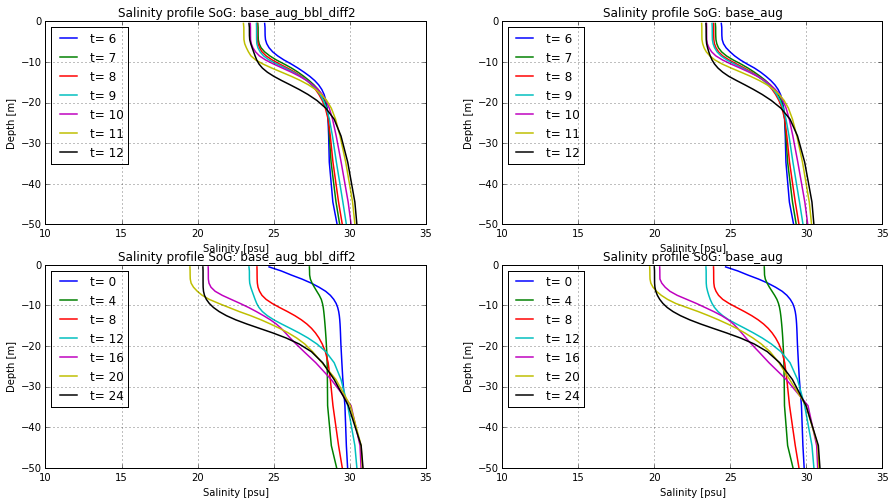

In [12]:
i = 900;

fig, axs = plt.subplots(2,2,figsize=(15,8))
ts = np.arange(6,13,1)

for run, ax in zip(runs, axs[0,:].flat):
    for t in zip(ts):
        ax.plot(Ss[run][t,:,i].T,zz[:,i],label='t= {}'.format(t[0]),lw=1.5)
        ax.set_title('Salinity profile SoG: {}'.format(run))
        
ts = np.arange(0,27,4)

for run, ax in zip(runs, axs[1,:].flat):
    for t in zip(ts):
        ax.plot(Ss[run][t,:,i].T,zz[:,i],label='t= {}'.format(t[0]),lw=1.5)
        ax.set_title('Salinity profile SoG: {}'.format(run))

    
for ax in axs.flat:
    ax.legend(loc=0)
    ax.grid()
    ax.set_xlim([10,35])
    ax.set_ylim([-50,0])
    ax.set_xlabel('Salinity [psu]')
    ax.set_ylabel('Depth [m]')
        
#for t, ax in zip(ts, axs[:,2].flat):
#    ax.pcolormesh(xx,zz,Ss[run1][t,:,:]-Ss[run2][t,:,:],vmin=-1,vm

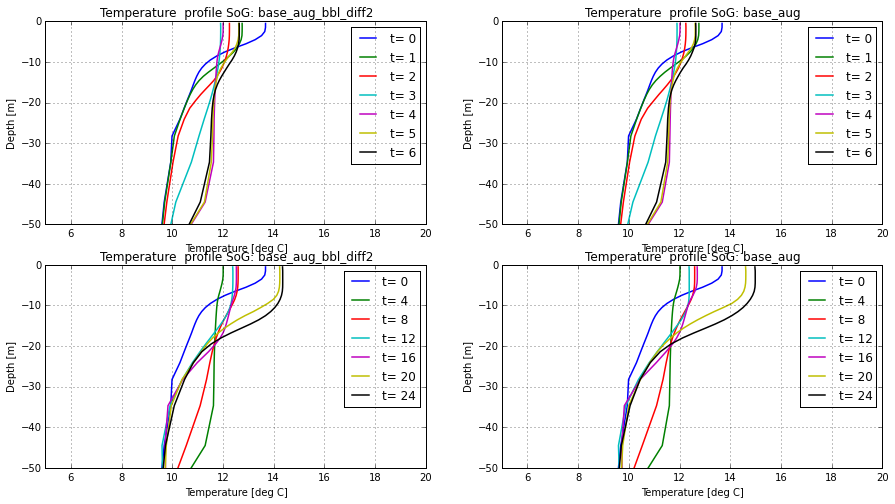

In [13]:
i = 900;

fig, axs = plt.subplots(2,2,figsize=(15,8))
ts = np.arange(0,7,1)

for run, ax in zip(runs, axs[0,:].flat):
    for t in zip(ts):
        ax.plot(Ts[run][t,:,i].T,zz[:,i],label='t= {}'.format(t[0]),lw=1.5)
        ax.set_title('Temperature  profile SoG: {}'.format(run))

ts = np.arange(0,27,4)

for run, ax in zip(runs, axs[1,:].flat):
    for t in zip(ts):
        ax.plot(Ts[run][t,:,i].T,zz[:,i],label='t= {}'.format(t[0]),lw=1.5) 
        ax.set_title('Temperature  profile SoG: {}'.format(run))
    
for ax in axs.flat:    
    ax.legend(loc=0)
    ax.grid()
    ax.set_xlim([5,20])
    ax.set_ylim([-50,0])
    ax.set_xlabel('Temperature [deg C]')
    ax.set_ylabel('Depth [m]')

Averaging across SoG basin: 400km to 500km

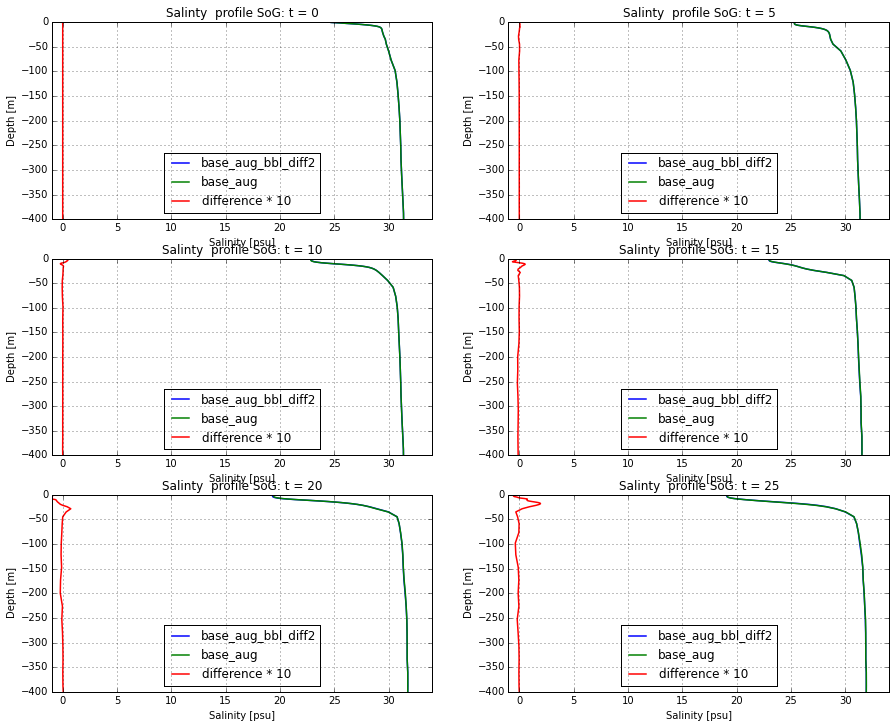

In [14]:
i = 800; e=1000;

fig, axs = plt.subplots(3,2,figsize=(15,12))
ts = np.arange(0,27,5)
for run in runs:
    Ss[run] = np.ma.masked_values(Ss[run],0)

for t, ax in zip(ts, axs.flat):
    for run in runs:
        ax.plot(np.nanmean(Ss[run][t,:,i:e],axis=1).T,zz[:,i],label=run,lw=1.5)
        ax.set_title('Salinty  profile SoG: t = {}'.format(t))
    diff = np.nanmean(Ss[run1][t,:,i:e],axis=1) - np.nanmean(Ss[run2][t,:,i:e],axis=1)
    ax.plot(10*diff.T,zz[:,i],label='difference * 10',lw=1.5)
    
for ax in axs.flat:    
    ax.legend(loc=0)
    ax.grid()
    ax.set_xlim([-1,34])
    ax.set_ylim([-400,0])
    ax.set_xlabel('Salinity [psu]')
    ax.set_ylabel('Depth [m]')

Biggest differences are in the surface. Is it because of how the river is entering the domain?